In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import MultiTaskLasso
from scipy.io import loadmat

In [2]:
testCaseFile = '/Users/edwardlrichards/compressiveBeamforming/MMVexport/lasso_testCase.mat'
testCase = loadmat(testCaseFile)
# print(testCase.keys())
X = testCase['A']
Y = testCase['yn_ms']
alpha = testCase['mu'][0][0]
result = testCase['x_l1']
result = np.linalg.norm(result, 2, axis =1)

In [3]:
#Construct the problem

XSplit = np.vstack((np.hstack((X.real, X.imag)),\
                    np.hstack((-X.imag, X.real))))
numSnaps = Y.shape[1]
numLook = X.shape[1]
numEl = Y.shape[0]

constraint1 = []
constraint2 = []

for snap in Y.T:
    constraint1.append(np.vstack((snap.real, snap.imag)))
    constraint2.append(np.vstack((-snap.imag, snap.real)))

constraint1 = np.array(constraint1)
constraint1 = constraint1.reshape(numSnaps * 2, numEl).T
constraint2 = np.array(constraint2)
constraint2 = constraint2.reshape(numSnaps * 2, numEl).T

Y_stack = np.vstack((constraint1, constraint2))

In [4]:
%time lasso_solver = MultiTaskLasso(alpha=0.8, max_iter=1e4)

task_lasso = lasso_solver.fit(XSplit, Y_stack)
lasso_stack = task_lasso.coef_[::2,:]
lasso_stack = lasso_stack[:,:numLook] + 1j * lasso_stack[:,numLook:]
lasso_stack = np.linalg.norm(lasso_stack, 2, axis = 0)
lasso_stack = np.nan_to_num(lasso_stack)

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 19.1 µs


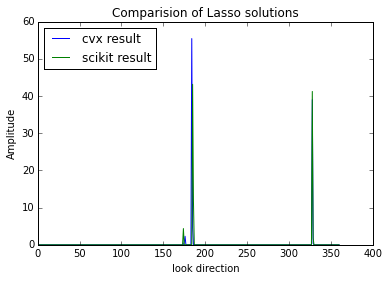

In [5]:
_ = plt.plot(result, label='cvx result')
_ = plt.plot(lasso_stack, label='scikit result')
_ = plt.title('Comparision of Lasso solutions')
_ = plt.xlabel('look direction')
_ = plt.ylabel('Amplitude')
_ = plt.legend(loc=2)
plt.savefig('./figures/benchmarkResult')